In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

why %matplotlib inline

In [2]:
#read the dataset
dataset=pd.read_csv("C:\\Users\\HP\\Desktop\\train.csv")

In [3]:
#df.isna().sum()
print('zfnsjdb')

zfnsjdb


Since lgbtq_out, country_birth fewsture having more than 95% of missing values so we can drop these

In [4]:
#data=df.copy()
dataset.head()

,carID,sound_level,engine_capacity,Torque,Total_distance,mileage_per_litre,fuel_efficiency,Accidents_history,no.of.services_per_year,years_of_use,owners,emission_rate,Type
0,MODEL-5939,80.0,1146,7331,25779,7.233290,46.215374,0,9,2,4,euro-2,Petrol
1,MODEL-15067,60.0,1296,7206,13101,9.502186,49.081800,0,4,4,2,euro-5,Diesel
2,MODEL-797,93.0,4242,4849,28084,3.036102,49.195779,1,7,5,1,euro-2,CNG
3,MODEL-14661,93.0,2702,7465,13677,11.766677,46.397479,0,5,9,3,euro-4,CNG
4,MODEL-7131,124.0,4850,5512,22898,9.575889,44.092761,0,6,1,2,euro-5,Diesel


In [5]:
#Finding null values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

In [6]:
#we need to find relationship between missing columns with target column
#copy dataset to data  having null values
for feature in features_with_na:
    data=dataset.copy()
#make value of variable 1 if column value is null otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)

#calculate mean target column value for missing values
    data.groupby(feature)['Type'].count().plot.bar()
    plt.title(feature)
    plt.show()
#take count of index column
#print('id of voters{}'.format(len(dataset.id)))

number of numerical variable 10
no.of.services_per_year [ 9  4  7  5  6  1  2  8 10 11  3]


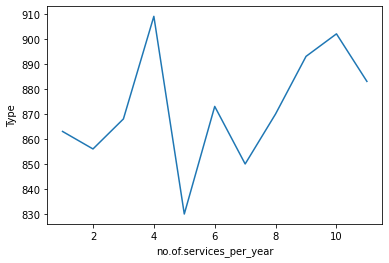

years_of_use [2 4 5 9 1 8 3 7 6]


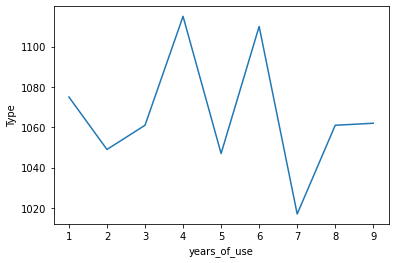

In [7]:
#numerical variables
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
#print numerical column 
print('number of numerical variable',len(numerical_features))
dataset[numerical_features].head()

#find feature that contain year information - temporal variable
year_feature=[feature for feature in numerical_features if 'year' in feature]

#print feature values
for feature in year_feature:
    print(feature,dataset[feature].unique())
    #analyse temporal data with target column
    dataset.groupby(feature)['Type'].count().plot()
    plt.xlabel(feature)
    plt.ylabel('Type')
    plt.show()

descrete variable count 2


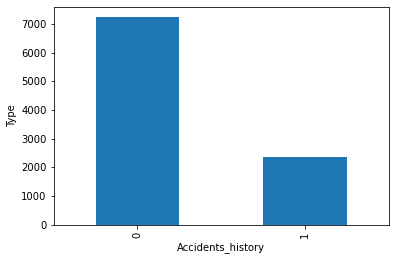

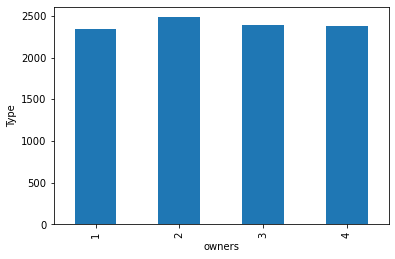

In [8]:
#Numerical variables
descrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['id']]
print('descrete variable count {}'.format(len(descrete_feature)))
dataset[descrete_feature].head()
# find rel b/w descrete feature and target column
for feature in descrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Type'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Type')
    plt.show()

In [9]:
#continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature+year_feature+['id']]
print('continuous feature{}'.format(len(continuous_feature)))

continuous feature6


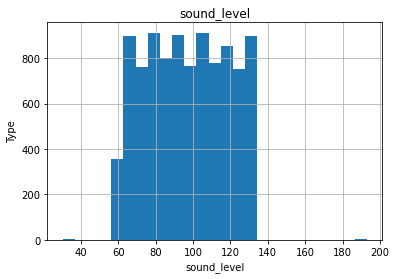

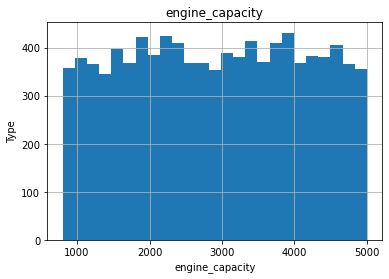

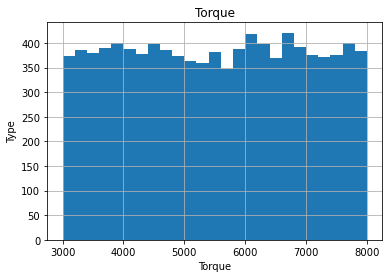

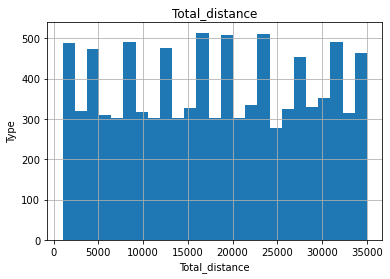

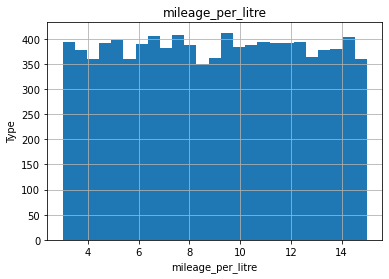

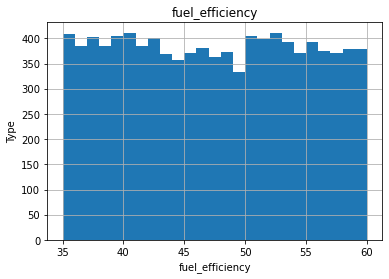

In [10]:
#analyse continuos feature with target column
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Type')
    plt.title(feature)
    plt.show()

In [11]:
#dataset.drop(['ID'],axis=1,inplace=True)

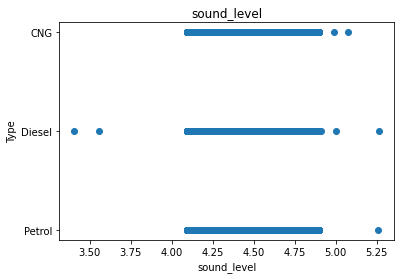

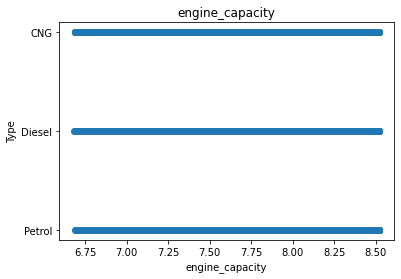

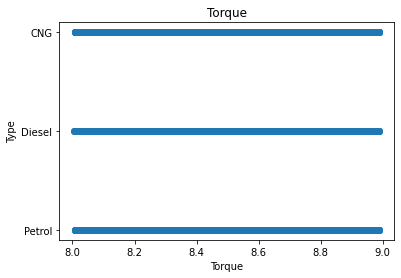

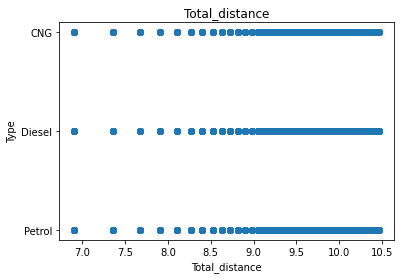

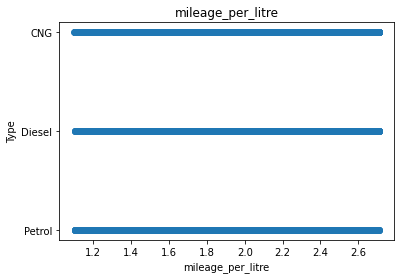

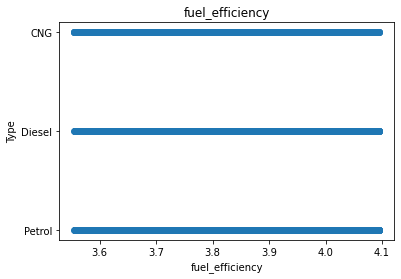

In [12]:
#numerical variable is going to convert into normal distribution using log fn.
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        #data['elected']=data['elected']
        plt.scatter(data[feature],data['Type'])
        plt.xlabel(feature)
        plt.ylabel('Type')
        plt.title(feature)
        plt.show()

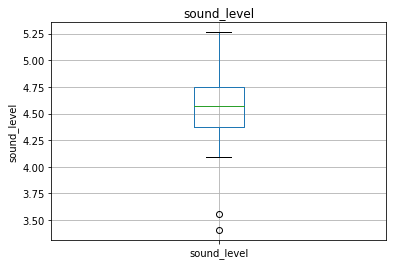

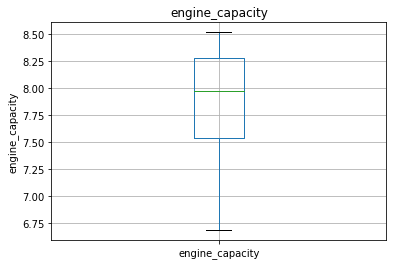

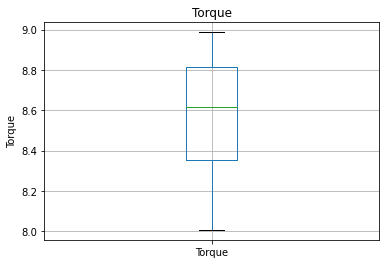

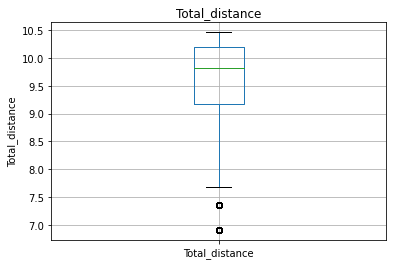

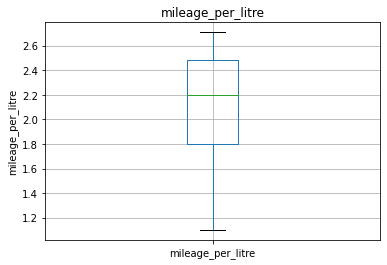

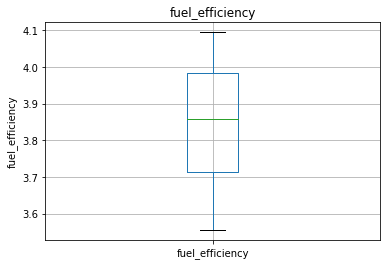

In [13]:
#finding outliers for only continuous features
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [14]:
#finding categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('caterical features {}'.format(categorical_features))
dataset[categorical_features].head()

caterical features ['carID', 'emission_rate', 'Type']


,carID,emission_rate,Type
0,MODEL-5939,euro-2,Petrol
1,MODEL-15067,euro-5,Diesel
2,MODEL-797,euro-2,CNG
3,MODEL-14661,euro-4,CNG
4,MODEL-7131,euro-5,Diesel


In [15]:
#printing  category names 
for feature in categorical_features:
    print('feature is  {} and number of categories is {}'.format(feature,len(dataset[feature].unique())))
    

feature is  carID and number of categories is 9597
feature is  emission_rate and number of categories is 5
feature is  Type and number of categories is 3


In [16]:
#check missing values in categorical columns
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
for feature in features_nan:
        print('feature is {} : {} % missing values'.format(feature,np.round(dataset[feature].isnull().mean(),4)))
#replace missing values with a new label
def replace_cat_feature(dataset,feature_nan):
    data=dataset.copy()
    data[feature_nan]=data[feature_nan].fillna("missing")
    return data
dataset=replace_cat_feature(dataset,features_nan)
dataset[features_nan].isnull().sum()
print(dataset.head()) 
print(dataset.shape)

         carID  sound_level  engine_capacity  Torque  Total_distance  \
0   MODEL-5939         80.0             1146    7331           25779   
1  MODEL-15067         60.0             1296    7206           13101   
2    MODEL-797         93.0             4242    4849           28084   
3  MODEL-14661         93.0             2702    7465           13677   
4   MODEL-7131        124.0             4850    5512           22898   

   mileage_per_litre  fuel_efficiency  Accidents_history  \
0           7.233290        46.215374                  0   
1           9.502186        49.081800                  0   
2           3.036102        49.195779                  1   
3          11.766677        46.397479                  0   
4           9.575889        44.092761                  0   

   no.of.services_per_year  years_of_use  owners emission_rate    Type  
0                        9             2       4        euro-2  Petrol  
1                        4             4       2        euro

In [17]:
# check numerical fetures with missing values and filling with median
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    print('feature is {}:{} % missing values'.format(feature,np.round(dataset[feature].isnull().mean(),4)))
#replace numerical missing values
for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    #create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
print(dataset.shape)

(9597, 13)


In [18]:
#remove outliers for 2 columns
def outlier_rem(column):
    Q1=np.percentile(dataset[column],25,interpolation='midpoint')
    Q2=np.percentile(dataset[column],50,interpolation='midpoint')
    Q3=np.percentile(dataset[column],75,interpolation='midpoint')
    IQR = Q3 - Q1
    lowlim=Q1-1.5*IQR
    uplim=Q3+1.5*IQR
    print(lowlim)
    print(uplim)
    outlier = []
    for x in dataset[column]:
        if ((x>uplim) or (x,lowlim)):
            outlier.append(x)
    ind1=dataset[column]>uplim
    x=dataset.loc[ind1].index

    dataset.drop(x,inplace = True)
    return

columns=['sound_level','Total_distance']
for x in columns:
    outlier_rem(x)

25.0
169.0
-16288.0
52864.0


In [19]:
# Added a new column age(the age of the candidate at the time of election) 
#data['age'] = data['year'] - data['birth_year']

In [20]:
#numerical variable- taking log value:

def num_log():
    num_features=['mileage_per_litre','fuel_efficiency']
    for feature in num_features:
        dataset[feature]=np.log(dataset[feature])
    dataset.head()
    print(dataset.shape)
    return
num_log()

(9595, 13)


In [21]:
#frequency encoding for following columns
def freq_encoding(dataset1):
    for value in dataset1.columns:
        
        print(dataset1[value].value_counts())
        df_freq_map=dataset1[value].value_counts().to_dict()
        dataset1[value+'count']=dataset1[value].map(df_freq_map)
        
    return dataset1 
values= ['emission_rate','Type']

dataset1=pd.read_csv("C:\\Users\\HP\\Desktop\\train.csv",usecols= values)
dataset1=freq_encoding(dataset1)      
dataset = pd.concat([dataset, dataset1], axis=1, join='inner')
dataset.drop(['emission_rate','Type'],axis=1,inplace=True)        
print(dataset.head())
print(dataset.shape)

euro-2    1986
euro-3    1932
euro-4    1922
euro-1    1890
euro-5    1867
Name: emission_rate, dtype: int64
CNG       3532
Diesel    3198
Petrol    2867
Name: Type, dtype: int64
         carID  sound_level  engine_capacity  Torque  Total_distance  \
0   MODEL-5939         80.0             1146    7331           25779   
1  MODEL-15067         60.0             1296    7206           13101   
2    MODEL-797         93.0             4242    4849           28084   
3  MODEL-14661         93.0             2702    7465           13677   
4   MODEL-7131        124.0             4850    5512           22898   

   mileage_per_litre  fuel_efficiency  Accidents_history  \
0           1.978694         3.833313                  0   
1           2.251522         3.893488                  0   
2           1.110574         3.895808                  1   
3           2.465272         3.837245                  0   
4           2.259248         3.786296                  0   

   no.of.services_per_year 

In [33]:
dataset_test=pd.read_csv("C:\\Users\\HP\\Desktop\\test.csv")
col=['emission_rate']
dataset1=pd.read_csv("C:\\Users\\HP\\Desktop\\test.csv",usecols= col)
dataset1=freq_encoding(dataset1)      
dataset_test = pd.concat([dataset_test, dataset1], axis=1, join='inner')
dataset_test.drop(['emission_rate'],axis=1,inplace=True)        
print(dataset_test.head())
print(dataset_test.shape)

euro-3    1297
euro-4    1294
euro-1    1278
euro-5    1268
euro-2    1262
Name: emission_rate, dtype: int64
        carID  sound_level  engine_capacity  Torque  Total_distance  \
0  MODEL-5388           60             3668    6338            9644   
1  MODEL-9984           95             4792    6986           17711   
2  MODEL-9448           69             1972    6525           14830   
3  MODEL-7471           74             1017    4191           13101   
4  MODEL-9119          104             3344    5886           10220   

   mileage_per_litre  fuel_efficiency  Accidents_history  \
0          11.216932        50.927105                  1   
1          10.926671        35.372252                  0   
2           7.086474        54.152738                  0   
3          12.266090        47.621681                  0   
4          14.241568        45.342329                  0   

   no.of.services_per_year  years_of_use  owners  emission_ratecount  
0                        5      

In [34]:
print(dataset.columns)
print(dataset_test.columns)
dataset.isna().sum()


Index(['carID', 'sound_level', 'engine_capacity', 'Torque', 'Total_distance',
       'mileage_per_litre', 'fuel_efficiency', 'Accidents_history',
       'no.of.services_per_year', 'years_of_use', 'owners',
       'emission_ratecount', 'Typecount'],
      dtype='object')
Index(['carID', 'sound_level', 'engine_capacity', 'Torque', 'Total_distance',
       'mileage_per_litre', 'fuel_efficiency', 'Accidents_history',
       'no.of.services_per_year', 'years_of_use', 'owners',
       'emission_ratecount'],
      dtype='object')


carID                      0
sound_level                0
engine_capacity            0
Torque                     0
Total_distance             0
mileage_per_litre          0
fuel_efficiency            0
Accidents_history          0
no.of.services_per_year    0
years_of_use               0
owners                     0
emission_ratecount         0
Typecount                  0
dtype: int64

In [35]:
print(dataset.shape)
print(dataset_test.shape)

(9595, 13)
(6399, 12)


In [36]:
dataset_test.head(100)

,carID,sound_level,engine_capacity,Torque,Total_distance,mileage_per_litre,fuel_efficiency,Accidents_history,no.of.services_per_year,years_of_use,owners,emission_ratecount
0,MODEL-5388,60,3668,6338,9644,11.216932,50.927105,1,5,8,4,1278
1,MODEL-9984,95,4792,6986,17711,10.926671,35.372252,0,8,1,2,1294
2,MODEL-9448,69,1972,6525,14830,7.086474,54.152738,0,2,3,4,1268
3,MODEL-7471,74,1017,4191,13101,12.266090,47.621681,0,1,3,2,1294
4,MODEL-9119,104,3344,5886,10220,14.241568,45.342329,0,6,9,2,1297
...,...,...,...,...,...,...,...,...,...,...,...,...
95,MODEL-11011,129,3367,6808,10220,10.899946,54.804394,1,2,2,1,1278
96,MODEL-11387,125,2374,3354,4457,7.479023,56.377726,1,1,1,1,1297
97,MODEL-12710,93,1259,3365,6762,13.926022,35.669895,0,6,8,2,1268
98,MODEL-6624,111,4838,3590,18288,5.342042,47.866819,0,9,5,1,1262


In [37]:
dataset.isna().sum()

carID                      0
sound_level                0
engine_capacity            0
Torque                     0
Total_distance             0
mileage_per_litre          0
fuel_efficiency            0
Accidents_history          0
no.of.services_per_year    0
years_of_use               0
owners                     0
emission_ratecount         0
Typecount                  0
dtype: int64

In [38]:
#dataset.drop(['locationcount','advice_to_mgmtcount'],axis=1,inplace=True)


In [39]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
feature_scale=[feature for feature in dataset.columns if feature not in ['Type','carID']]
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])
MinMaxScaler(copy=True,feature_range=(0,1))
scaler.transform(dataset[feature_scale])
print(dataset.head())

         carID  sound_level  engine_capacity  Torque  Total_distance  \
0   MODEL-5939         80.0             1146    7331           25779   
1  MODEL-15067         60.0             1296    7206           13101   
2    MODEL-797         93.0             4242    4849           28084   
3  MODEL-14661         93.0             2702    7465           13677   
4   MODEL-7131        124.0             4850    5512           22898   

   mileage_per_litre  fuel_efficiency  Accidents_history  \
0           1.978694         3.833313                  0   
1           2.251522         3.893488                  0   
2           1.110574         3.895808                  1   
3           2.465272         3.837245                  0   
4           2.259248         3.786296                  0   

   no.of.services_per_year  years_of_use  owners  emission_ratecount  \
0                        9             2       4                1986   
1                        4             4       2              

In [40]:
#drop inf values of all columns

def dro_inf_values():
    for i in  dataset.columns:
        if (i=='sound_level' or i=='engine_capacity' or i=='Torque' or i=='Total_distance'  or i=='mileage_per_litre'  or i=='fuel_efficiency' or i=='Accidents_history' or i=='services_per_year' or i=='years_of_use' or i=='owners' or i=='emission_ratecount') and np.isinf(dataset[i]).values.any():
            dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
            dataset.dropna(subset=['sound_level','engine_capacity','Torque','Total_distance','mileage_per_litre','fuel_efficiency','Accidents_history','no.of.services_per_year','years_of_use','owners','emission_ratecount'], how="all", inplace=True)
   
    return
dro_inf_values()

In [41]:
dataset.columns

Index(['carID', 'sound_level', 'engine_capacity', 'Torque', 'Total_distance',
       'mileage_per_litre', 'fuel_efficiency', 'Accidents_history',
       'no.of.services_per_year', 'years_of_use', 'owners',
       'emission_ratecount', 'Typecount'],
      dtype='object')

In [42]:
dataset.dtypes

carID                       object
sound_level                float64
engine_capacity              int64
Torque                       int64
Total_distance               int64
mileage_per_litre          float64
fuel_efficiency            float64
Accidents_history            int64
no.of.services_per_year      int64
years_of_use                 int64
owners                       int64
emission_ratecount           int64
Typecount                    int64
dtype: object

In [43]:
#from sklearn.linear_model import Lasso
#from sklearn.feature_selection import SelectFromModel
dataset=dataset.replace(np.nan,0)
Y=dataset[['Typecount']]
X=dataset.drop(['carID','Typecount'],axis=1)
#selection model
#feature_sel_model=SelectFromModel(Lasso(alpha=.005,random_state=0))
#feature_sel_model.fit_transform(X,Y)
#feature_sel_model.get_support()

In [44]:
print(dataset.columns)
print(dataset_test.columns)


Index(['carID', 'sound_level', 'engine_capacity', 'Torque', 'Total_distance',
       'mileage_per_litre', 'fuel_efficiency', 'Accidents_history',
       'no.of.services_per_year', 'years_of_use', 'owners',
       'emission_ratecount', 'Typecount'],
      dtype='object')
Index(['carID', 'sound_level', 'engine_capacity', 'Torque', 'Total_distance',
       'mileage_per_litre', 'fuel_efficiency', 'Accidents_history',
       'no.of.services_per_year', 'years_of_use', 'owners',
       'emission_ratecount'],
      dtype='object')


In [45]:
#data.iloc[:, 0:2] # first two columns of data frame with all rows
#X_train=dataset.iloc[:,1:12]
#Y_train=Y
#X_test=dataset_test.iloc[:,1:12]  
#print(X_train)
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)


LOGISTIC REGRESSION

In [46]:
#datasetf['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)


from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(X_train,Y_train)
Y_pred = logit_reg.predict(X_test)
Y_pred

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3198, 3532, 3532, ..., 3532, 3532, 3532], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix


print("accuracy is:",accuracy_score(Y_test,Y_pred))
print("precision score:",precision_score(Y_test,Y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,Y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,Y_pred,average='macro'))

accuracy is: 0.36216779572694113
precision score: 0.22445167169431876
recall_score: 0.32694967965849553
f1 score: 0.23025556255247692


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DESICION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred = dt_model.predict(X_test)

In [49]:

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.3381969775924961
precision score: 0.3365303623111097
recall_score: 0.3368311586820814
f1 score: 0.33657375980719634


RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=100)
random.fit(X_train,Y_train)

y_pred=random.predict(X_test)
y_pred


C:\Users\HP\AppData\Local\Temp\ipykernel_15520\2178641526.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train,Y_train)


array([3198, 3532, 3198, ..., 3198, 3532, 3198], dtype=int64)

In [51]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='weighted'))

accuracy is: 0.34080250130276185
precision score: 0.33407216467472534
recall_score: 0.33056314393443226
f1 score: 0.33329760298370675


In [55]:
X_test=dataset_test.iloc[:,1:12]  
y_pred=random.predict(X_test)

data_sub=pd.DataFrame(y_pred)

data_sub['carID']=dataset_test['carID']

data_sub['Type']=y_pred
dict={3198:'Petrol',2867:'Diesel',3532:'CNG'}
data_sub['Type']=data_sub['Type'].map(dict)

data_sub.to_csv('C:\\Users\\HP\\Desktop\\output.csv',index=False)